# PROJET 8 : COMMUNIQUEZ VOS RÉSULTATS

## PRÉALABLES :

### A - Importation des librairies :

In [1]:
# Importation des bibliothèques :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

### B - Importation des fichiers :

In [2]:
# Importation des fichiers :
dataCreepy = pd.read_excel("creepypastas.xlsx")
dataHorror = pd.read_csv("horror_movies.csv")

### C - Vérification des données :

#### 1 - dataHorror

In [3]:
# Conversion de la colonne "Release Date" :
dataHorror["Release Date"] = pd.to_datetime(dataHorror["Release Date"])

In [4]:
# Conversion de la colonne "Run Time"
dataHorror["Movie Run Time"] = dataHorror["Movie Run Time"].str.replace('min', '')
dataHorror["Movie Run Time"] = pd.to_numeric(dataHorror["Movie Run Time"]).astype("Int64")

In [5]:
# Conversion de la colonne "Budget"
dataHorror["Budget"] = dataHorror["Budget"].str.replace('$', '')
dataHorror["Budget"] = dataHorror["Budget"].str.replace(',', '')
dataHorror["Budget"] = pd.to_numeric(dataHorror["Budget"], errors="coerce").astype("Float64")

<ipython-input-5-f5cf1147f84c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dataHorror["Budget"] = dataHorror["Budget"].str.replace('$', '')


In [6]:
# Conversion de la colonne "Review Rating"
dataHorror.rename(columns={"Review Rating":"Review_Rating"}, inplace=True)

#### 2 - dataCreepy

In [7]:
# Conversion de la colonne "estimated_reading_time" :
dataCreepy["estimated_reading_time"] = dataCreepy["estimated_reading_time"].str.replace('minutes', '')
dataCreepy["estimated_reading_time"] = dataCreepy["estimated_reading_time"].str.replace('minute', '')
dataCreepy["estimated_reading_time"] = dataCreepy["estimated_reading_time"].str.replace('minut', '')
dataCreepy["estimated_reading_time"] = dataCreepy["estimated_reading_time"].str.replace('<', '')
dataCreepy["estimated_reading_time"] = pd.to_numeric(dataCreepy["estimated_reading_time"]).astype("Int64")

In [8]:
# Conversion de "publish_date" :
dataCreepy["publish_date"] = pd.to_datetime(dataCreepy["publish_date"], errors="coerce")

## I - dataHorror

### A - Modification des dataframes :

#### 1 - Création d'un data "Box Office"

In [9]:
# Restriction Budget > 500 000 dollars :
dataHorrorBoxOf = dataHorror[dataHorror.Budget > 500000]

#### 2 - Création des zones géographiques :

In [10]:
# Création d'une colonne "Release_Region" :
countryMovies = dataHorror.groupby(by="Release Country",as_index=False).count()
countryRegion = pd.DataFrame(countryMovies["Release Country"])
countryRegion["Region"] = ["W","O","E","A","E","E","W","W","E","A","W","W","A","W","E","E","O","E","E","E","E","E","A","E","E","A","A","A","E","A","E","A","A","A","E","A","O","W","E","O","O","E","A","W","W","A","E","E","W","A","E","E","E","A","E","E","O","A","E","A","E","E","A","A","A","E","U","E","A","W","W","A"]
dataHorror = pd.merge(dataHorror, countryRegion, on="Release Country")
dataHorror["Region"] = dataHorror["Region"].replace({"W":"Autres","E":"Europe","A":"Asie","O":"Autres","U":"USA"})
dataHorrorBoxOf = pd.merge(dataHorrorBoxOf, countryRegion, on="Release Country", how="left")
dataHorrorBoxOf["Region"] = dataHorrorBoxOf["Region"].replace({"W":"Autres","E":"Europe","A":"Asie","O":"Autres","U":"USA"})

In [11]:
# Suppression des objets inutiles :
del countryMovies, countryRegion

### B - Incidence géographique :

#### 1 - Nombre total de films par région :

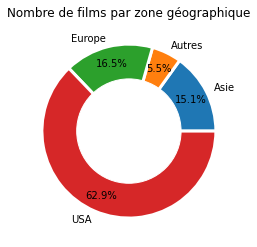

In [12]:
# Groupement par région :
countryMovies = dataHorror.groupby(by="Region",as_index=False).count()
names = countryMovies["Region"]
size = countryMovies["Title"]

# Visualisation en donut :
my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie(size , labels=names, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%',pctdistance=0.8)
plt.title("Nombre de films par zone géographique")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### 2 - Nombre total de films du boxoffice par Région :

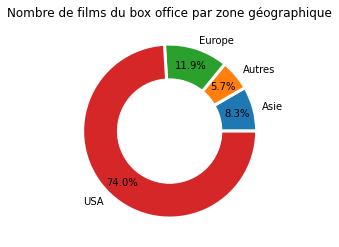

In [13]:
# Groupement par région :
countryMovies = dataHorrorBoxOf.groupby(by="Region",as_index=False).count()
names = countryMovies["Region"]
size = countryMovies["Title"]

# Visualisation en donut :
my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie(size , labels=names, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%',pctdistance=0.8)
plt.title("Nombre de films du box office par zone géographique")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### 3 - Budget et zone géographique :

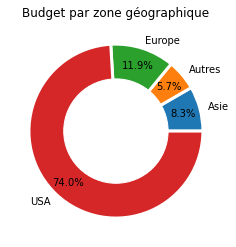

In [14]:
# Groupement par région :
countryBudget = dataHorror.groupby(by="Region",as_index=False).sum()
names = countryMovies["Region"]
size = countryMovies["Budget"]

# Visualisation en donut :
my_circle = plt.Circle( (0,0), 0.6, color='white')
plt.pie(size , labels=names, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },autopct='%1.1f%%',pctdistance=0.8)
plt.title("Budget par zone géographique")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

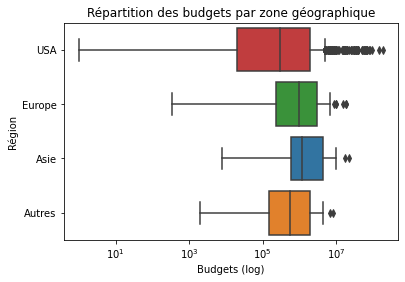

In [15]:
# Répartition des budgets par zone :
my_pal = {"USA":"#d62728", "Autres":"#ff7f0e", "Europe":"#2ca02c","Asie":"#1f77b4"}
sns.boxplot(y=dataHorror["Region"], x=dataHorror["Budget"], orient="h", order=["USA","Europe","Asie","Autres"], showfliers=True, palette=my_pal)
plt.xscale("log")
plt.xlabel("Budgets (log)")
plt.ylabel("Région")
plt.title("Répartition des budgets par zone géographique")
plt.show()

### B - Budget et critiques

#### 1 - Influence du budget sur l'évaluation :

Text(0, 0.5, 'Note reçue')

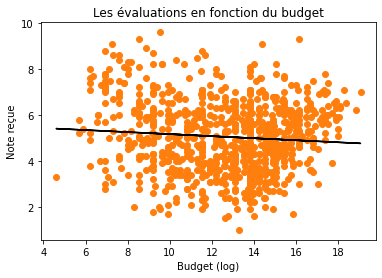

In [16]:
# Les évaluations en fonction du budget (total) :

# Suppression des valeurs manquantes :
dataHorror2 = dataHorror.drop(dataHorror.loc[dataHorror["Budget"].isnull()].index)
dataHorror2 = dataHorror2.drop(dataHorror2.loc[dataHorror["Review_Rating"].isnull()].index)

# Définition des variables :
x = np.log(dataHorror2["Budget"].astype("float"))
y = dataHorror2["Review_Rating"].astype("float")

# Propriétés de régression linéaire :
m, b = np.polyfit(x, y,1)

# Nuage d'individus et regression :
plt.plot(x, y, 'o', color="#ff7f0e")
plt.plot(x, m*x+b, '-k')
plt.title("Les évaluations en fonction du budget")
plt.xlabel("Budget (log)")
# plt.xscale("log")
plt.ylabel("Note reçue")

In [17]:
# Corrélation (Pearson)
stats.pearsonr(np.log(dataHorror2["Budget"]), dataHorror2["Review_Rating"])

(-0.08236175995663275, 0.016506004132342992)

Text(0, 0.5, 'Note reçue')

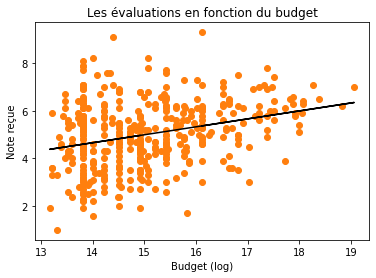

In [18]:
# Les évaluations en fonction du budget (Box Office)

# Suppression des valeurs manquantes :
dataHorrorBoxOf2 = dataHorrorBoxOf.drop(dataHorrorBoxOf.loc[dataHorrorBoxOf["Budget"].isnull()].index)
dataHorrorBoxOf2 = dataHorrorBoxOf2.drop(dataHorrorBoxOf2.loc[dataHorrorBoxOf["Review_Rating"].isnull()].index)

# Définition des variables :
x = np.log(dataHorrorBoxOf2["Budget"].astype("float"))
y = dataHorrorBoxOf2["Review_Rating"].astype("float")

# Propriétés de régression linéaire :
m, b = np.polyfit(x, y,1)

# Nuage d'individus et regression :
plt.plot(x, y, 'o', color="#ff7f0e")
plt.plot(x, m*x+b, '-k')
plt.title("Les évaluations en fonction du budget")
plt.xlabel("Budget (log)")
# plt.xscale("log")
plt.ylabel("Note reçue")

In [19]:
# Corrélation (Pearson)
stats.pearsonr(np.log(dataHorrorBoxOf2["Budget"]), dataHorrorBoxOf2["Review_Rating"])

(0.28989074943509263, 2.429475080406101e-09)

### C - Région et évaluation :

#### 1 - Tous les films:

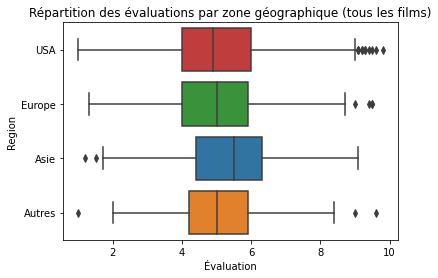

In [20]:
# Boxplot Région/évaluation (tous les films)
sns.boxplot(y="Region", x="Review_Rating", data=dataHorror, orient="h",order=["USA","Europe","Asie","Autres"],palette=my_pal)
plt.xlabel("Évaluation")
plt.ylabel("Region")
plt.title("Répartition des évaluations par zone géographique (tous les films)")
plt.show()

In [21]:
# ANOVA :
anovaRegionReview = smf.ols("Review_Rating  ~ Region", data=dataHorror).fit()
anovaRegionReview.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Review_Rating   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.368
Date:                Mon, 31 May 2021   Prob (F-statistic):           6.43e-05
Time:                        15:41:28   Log-Likelihood:                -5547.1
No. Observations:                3076   AIC:                         1.110e+04
Df Residuals:                    3072   BIC:                         1.113e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.3623      0.067     80.350      0.000       5.231       5.493
Region[T.Autres]    -0.2671      0.133     -2.012      0.044      -0.527      -0.007
Region[T.Europe]    -0.3455      0.093     -3.710      0.000      -0.528      -0.163
Region[T.USA]       -0.3429      0.075     -4.590      0.000      -0.489      -0.196
==============================================================================
Omnibus:                       25.501   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.968
Skew:                           0.220   Prob(JB):                     2.30e-06
Kurtosis:                       2.903   Cond. No.                         7.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2 - BoxOf :

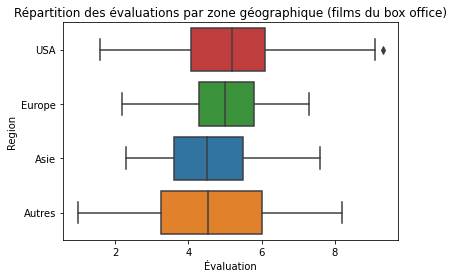

In [22]:
# Boxplot Région/évaluation (tous les films)
sns.boxplot(y="Region", x="Review_Rating", data=dataHorrorBoxOf, orient="h", order=["USA","Europe","Asie","Autres"], palette=my_pal)
plt.xlabel("Évaluation")
plt.ylabel("Region")
plt.title("Répartition des évaluations par zone géographique (films du box office)")
plt.show()

In [23]:
# ANOVA :
anovaBoxOfRegionReview = smf.ols("Review_Rating  ~ Region", data=dataHorrorBoxOf).fit()
anovaBoxOfRegionReview.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Review_Rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.429
Date:                Mon, 31 May 2021   Prob (F-statistic):              0.234
Time:                        15:41:28   Log-Likelihood:                -717.88
No. Observations:                 408   AIC:                             1444.
Df Residuals:                     404   BIC:                             1460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6543      0.239     19.491      0.000       4.185       5.124
Region[T.Autres]     0.0165      0.374      0.044      0.965      -0.719       0.753
Region[T.Europe]     0.3335      0.313      1.067      0.287      -0.281       0.948
Region[T.USA]        0.4227      0.252      1.675      0.095      -0.073       0.919
==============================================================================
Omnibus:                        1.056   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                1.077
Skew:                          -0.029   Prob(JB):                        0.583
Kurtosis:                       2.755   Cond. No.                         9.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3 - Meilleures films par régions (top 5) :

In [24]:
# USA :
USA = dataHorrorBoxOf[dataHorrorBoxOf["Region"]=="USA"]
USA.sort_values(by="Review_Rating", ascending=False).head(5)

,Title,Genres,Release Date,Release Country,Movie Rating,Review_Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Region
55,Take 2: The Audition (2015),Horror,2015-02-01,USA,NaN,9.3,<NA>,"Directed by Rob Hawk. With Tyler Mane, Genovev...",Tyler Mane|Genoveva Rossi|Cabrina Collesides|U...,English,NaN,10000000.0,USA
175,Do You See Me (2017),Horror,2017-05-20,USA,NaN,9.1,<NA>,"Directed by Corbin Timbrook. With Lisa London,...",Lisa London|Gabrielle Stone|Philip Boyd|Jim Fi...,English,"Los Angeles, California, USA",1800000.0,USA
249,Blood Feast (2016),Horror,2017-06-23,USA,R,8.2,90,"Directed by Marcel Walz. With Robert Rusler, C...",Robert Rusler|Caroline Williams|Sophie Monk|Sa...,English,"Paris, France",1200000.0,USA
53,The Cursed Man (2016),Horror| Thriller,2016-10-31,USA,NaN,7.9,90,Directed by James L. Perry. With Brahm Gallagh...,Brahm Gallagher|Brinna Locke|Maritza Brikisak|...,English,"Los Angeles, California, USA",1000000.0,USA
59,Grave Secrets (2013),Drama| Family| Horror,2013-10-06,USA,NaN,7.9,75,Directed by David Hillenbrand. With Diane Ladd...,Diane Ladd|Jennifer Stone|Kevin Brief|Christin...,English,"Western Heights, Los Angeles, California, USA",1000000.0,USA


In [25]:
# Europe :
Europe = dataHorrorBoxOf[dataHorrorBoxOf["Region"]=="Europe"]
Europe.sort_values(by="Review_Rating", ascending=False).head(5)

,Title,Genres,Release Date,Release Country,Movie Rating,Review_Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Region
311,Only Lovers Left Alive (2013),Comedy| Drama| Horror| Romance,2013-12-25,Germany,R,7.3,123,"Directed by Jim Jarmusch. With Tilda Swinton, ...",Tilda Swinton|Tom Hiddleston|Anton Yelchin|Mia...,English|French|Arabic|Turkish,"Detroit, Michigan, USA",7000000.0,Europe
221,Habit (2017),Horror,2017-01-01,UK,NaN,7.1,90,Directed by Simeon Halligan. With Jessica Bard...,Jessica Barden|Roxanne Pallett|William Ash|Lou...,English,"Manchester, Greater Manchester, England, UK",1000000.0,Europe
391,Bone Tomahawk (2015),Adventure| Drama| Horror| Western,2016-02-19,UK,NOT RATED,7.1,132,Directed by S. Craig Zahler. With Kurt Russell...,Kurt Russell|Patrick Wilson|Matthew Fox|Richar...,English,"California, USA",1800000.0,Europe
19,The Apostle (2012),Animation| Horror,2015-04-23,Netherlands,NaN,7.0,<NA>,Directed by Fernando Cortizo. With Carlos Blan...,Carlos Blanco|Xosé Manuel Olveira 'Pico'|Paul ...,Spanish|Gallegan,NaN,15000000.0,Europe
229,Night of the Templar (2013),Horror| Mystery,2013-02-04,UK,NaN,6.6,101,"Directed by Paul Sampson. With Paul Sampson, D...",Paul Sampson|David Carradine|Udo Kier|Norman R...,English,"Agua Dulce Movie Ranch - 34855 Petersen Road, ...",3230000.0,Europe


In [26]:
# Asie :
Asie = dataHorrorBoxOf[dataHorrorBoxOf["Region"]=="Asie"]
Asie.sort_values(by="Review_Rating", ascending=False).head(5)

,Title,Genres,Release Date,Release Country,Movie Rating,Review_Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Region
91,Hind Ka Napak Ko Jawab (2017),Action| Comedy| Horror,2017-02-10,India,NaN,7.6,130,"Directed by Honeypreet Insan, Gurmeet Ram Rahi...",Gurmeet Ram Rahim Singh|Honeypreet Insan|Adity...,Hindi,NaN,5000000.0,Asie
5,Ular Tangga (2017),Horror| Thriller,2017-03-09,Indonesia,NaN,7.1,<NA>,"Directed by Arie Azis. With Ahmad Affandy, Ale...",Ahmad Affandy|Alessia Cestaro|Shareefa Daanish...,Indonesian,"Gunung Pancar, Indonesia",1000000.0,Asie
37,Dabbe: Zehr-i Cin (2014),Horror,2014-09-12,Turkey,NaN,6.4,133,Directed by Hasan Karacadag. With Ümit Bulent ...,Ümit Bulent Dincer|Nil Günal,Turkish,Turkey,700000.0,Asie
400,The House of the Devil (2009),Horror,2012-05-04,Taiwan,R,6.4,95,"Directed by Ti West. With Jocelin Donahue, Tom...",Jocelin Donahue|Tom Noonan|Mary Woronov|Greta ...,English,"Lakeville, Connecticut, USA",900000.0,Asie
144,Magi (2016),Horror,2016-04-29,Turkey,NaN,6.1,132,Directed by Hasan Karacadag. With Michael Mads...,Michael Madsen|Stephen Baldwin|Brianne Davis|L...,English,"Istanbul, Turkey",1100000.0,Asie


In [27]:
# Autres :
Autres = dataHorrorBoxOf[dataHorrorBoxOf["Region"]=="Autres"]
Autres.sort_values(by="Review_Rating", ascending=False).head(5)

,Title,Genres,Release Date,Release Country,Movie Rating,Review_Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Region
174,The Blue Elephant (2014),Drama| Horror| Mystery| Thriller,2014-07-28,Egypt,NaN,8.2,170,Directed by Marwan Hamed. With Karim Abdel Azi...,Karim Abdel Aziz|Khaled El Sawy|Nelly Karim|Mo...,Arabic,"Cairo, Egypt",3500000.0,Autres
122,Nilalang (2015),Action| Crime| Horror| Mystery| Thriller,2017-01-10,Canada,NaN,8.1,90,"Directed by Pedring Lopez. With Cesar Montano,...",Cesar Montano|Maria Ozawa|Meg Imperial|Yam Con...,Filipino|Tagalog|English|Japanese,Philippines,1000000.0,Autres
209,Styria (2014),Fantasy| Horror| Mystery| Thriller,2014-08-21,Mexico,NOT RATED,6.8,99,"Directed by Mauricio Chernovetzky, Mark Devend...",Eleanor Tomlinson|Stephen Rea|Erika Marozsán|J...,English|Hungarian,"Aszód, Hungary",3000000.0,Autres
77,Maligno (2016),Horror| Mystery,2016-07-14,Peru,NaN,6.7,87,"Directed by Paco Bardales, Martin Casapía Casa...",Sofía Rocha|Fiorella Pennano|Gino Pesaressi|Sy...,Spanish,"Iquitos, Peru",700000.0,Autres
401,The Final Girls (2015),Comedy| Horror,2015-11-05,Australia,PG-13,6.6,88,Directed by Todd Strauss-Schulson. With Taissa...,Taissa Farmiga|Malin Akerman|Alexander Ludwig|...,English,"Los Angeles, California, USA",4500000.0,Autres


In [28]:
# All :
dataHorrorBoxOf.sort_values(by="Review_Rating", ascending=False).head(20)

,Title,Genres,Release Date,Release Country,Movie Rating,Review_Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Region
55,Take 2: The Audition (2015),Horror,2015-02-01,USA,NaN,9.3,<NA>,"Directed by Rob Hawk. With Tyler Mane, Genovev...",Tyler Mane|Genoveva Rossi|Cabrina Collesides|U...,English,NaN,10000000.0,USA
175,Do You See Me (2017),Horror,2017-05-20,USA,NaN,9.1,<NA>,"Directed by Corbin Timbrook. With Lisa London,...",Lisa London|Gabrielle Stone|Philip Boyd|Jim Fi...,English,"Los Angeles, California, USA",1800000.0,USA
174,The Blue Elephant (2014),Drama| Horror| Mystery| Thriller,2014-07-28,Egypt,NaN,8.2,170,Directed by Marwan Hamed. With Karim Abdel Azi...,Karim Abdel Aziz|Khaled El Sawy|Nelly Karim|Mo...,Arabic,"Cairo, Egypt",3500000.0,Autres
249,Blood Feast (2016),Horror,2017-06-23,USA,R,8.2,90,"Directed by Marcel Walz. With Robert Rusler, C...",Robert Rusler|Caroline Williams|Sophie Monk|Sa...,English,"Paris, France",1200000.0,USA
122,Nilalang (2015),Action| Crime| Horror| Mystery| Thriller,2017-01-10,Canada,NaN,8.1,90,"Directed by Pedring Lopez. With Cesar Montano,...",Cesar Montano|Maria Ozawa|Meg Imperial|Yam Con...,Filipino|Tagalog|English|Japanese,Philippines,1000000.0,Autres
59,Grave Secrets (2013),Drama| Family| Horror,2013-10-06,USA,NaN,7.9,75,Directed by David Hillenbrand. With Diane Ladd...,Diane Ladd|Jennifer Stone|Kevin Brief|Christin...,English,"Western Heights, Los Angeles, California, USA",1000000.0,USA
53,The Cursed Man (2016),Horror| Thriller,2016-10-31,USA,NaN,7.9,90,Directed by James L. Perry. With Brahm Gallagh...,Brahm Gallagher|Brinna Locke|Maritza Brikisak|...,English,"Los Angeles, California, USA",1000000.0,USA
98,Kandisha (2008),Crime| Fantasy| Horror| Mystery| Thriller,2015-04-05,USA,NOT RATED,7.8,91,Directed by Jérôme Cohen-Olivar. With Hiam Abb...,Hiam Abbass|Amal Ayouch|Khalid Benchagra|Assaa...,Arabic|English|French,Morocco,3500000.0,USA
194,It (2017),Drama| Horror| Thriller,2017-09-08,USA,R,7.8,135,Directed by Andy Muschietti. With Bill Skarsgå...,Jaeden Lieberher|Jeremy Ray Taylor|Sophia Lill...,English,"Toronto, Ontario, Canada",35000000.0,USA
72,Vault of Terror II: The Undead (2015),Horror,2015-05-16,USA,NaN,7.7,120,"Directed by Charlton Jacob Jacques, Gregory Ku...",Lloyd Kaufman|Erika Smith|Tina Krause|Rachael ...,English,"New York City, New York, USA",1000000.0,USA


### D - Durée et évaluations :

#### 1 - Durée et évaluations :

Text(0, 0.5, 'Note reçue')

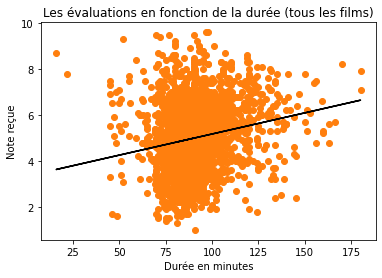

In [29]:
# Les évaluations en fonction de la durée (total)

# Suppression des valeurs manquantes :
dataHorror2 = dataHorror.drop(dataHorror.loc[dataHorror["Movie Run Time"].isnull()].index)
dataHorror2 = dataHorror2.drop(dataHorror2.loc[dataHorror2["Review_Rating"].isnull()].index)


# Définition des variables :
x = dataHorror2["Movie Run Time"].astype("float")
y = dataHorror2["Review_Rating"].astype("float")

# Propriétés de régression linéaire :
m, b = np.polyfit(x, y,1)

# Nuage d'individus et regression :
plt.plot(x, y, 'o', color="#ff7f0e")
plt.plot(x, m*x+b, '-k')
plt.title("Les évaluations en fonction de la durée (tous les films)")
plt.xlabel("Durée en minutes")
plt.ylabel("Note reçue")

In [30]:
# Corrélation (Pearson)
stats.pearsonr(dataHorror2["Movie Run Time"].astype("float64"), dataHorror2["Review_Rating"])

(0.19226251391934218, 7.049146885413317e-24)

Text(0, 0.5, 'Note reçue')

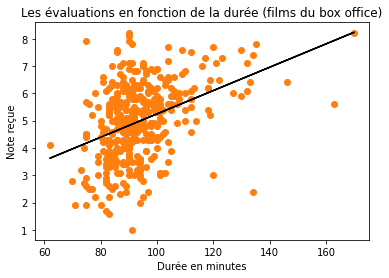

In [31]:
# Les évaluations en fonction de la durée (total)

# Suppression des valeurs manquantes :
dataHorrorBoxOf2 = dataHorrorBoxOf.drop(dataHorrorBoxOf.loc[dataHorrorBoxOf["Movie Run Time"].isnull()].index)
dataHorrorBoxOf2 = dataHorrorBoxOf2.drop(dataHorrorBoxOf2.loc[dataHorrorBoxOf2["Review_Rating"].isnull()].index)

# Définition des variables :
x = dataHorrorBoxOf2["Movie Run Time"].astype("float")
y = dataHorrorBoxOf2["Review_Rating"].astype("float")

# Propriétés de régression linéaire :
m, b = np.polyfit(x, y,1)

# Nuage d'individus et regression :
plt.plot(x, y, 'o', color="#ff7f0e")
plt.plot(x, m*x+b, '-k')
plt.title("Les évaluations en fonction de la durée (films du box office)")
plt.xlabel("Durée en minutes")
plt.ylabel("Note reçue")

In [32]:
# Corrélation (Pearson)
stats.pearsonr(dataHorrorBoxOf2["Movie Run Time"].astype("float64"), dataHorrorBoxOf2["Review_Rating"])

(0.39241617092150133, 2.7196394419009334e-15)

### E - Évolution et périodicité :

#### 1 - Évolution en nombre de films :

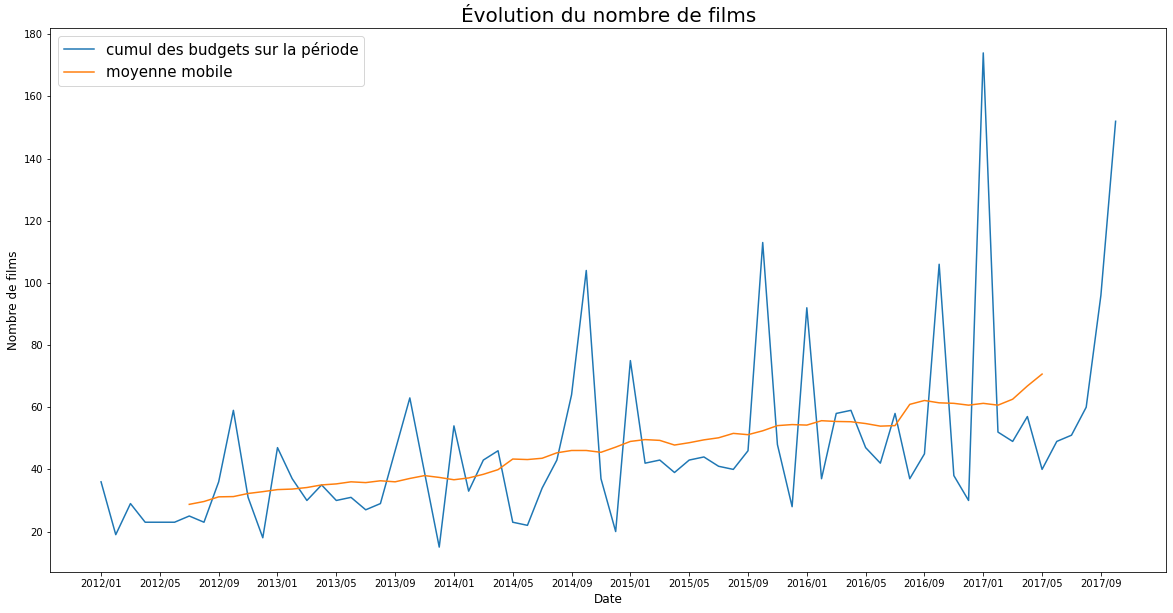

In [33]:
# Évolution du nombre de films :

# Préparation :
dataHorror["Date"] = dataHorror["Release Date"].dt.strftime('%Y/%m')
evoHorrorTitles = dataHorror.groupby("Date").count()

# Visualisation de la courbe :
plt.figure(figsize=(20,10))
plt.plot(evoHorrorTitles["Title"], label = "cumul des budgets sur la période")
plt.title("Évolution du nombre de films", fontsize="20")
plt.xticks(np.arange(0, 70, step=4))
plt.xlabel('Date',fontsize="12")
plt.ylabel('Nombre de films',fontsize="12")

# Moyenne flottante :
rolling_mean = evoHorrorTitles["Title"].rolling(window = 12, center=True).mean()
plt.plot(rolling_mean, label = "moyenne mobile")
plt.legend(fontsize="15")

#### 2 - Évolution en terme de budget :

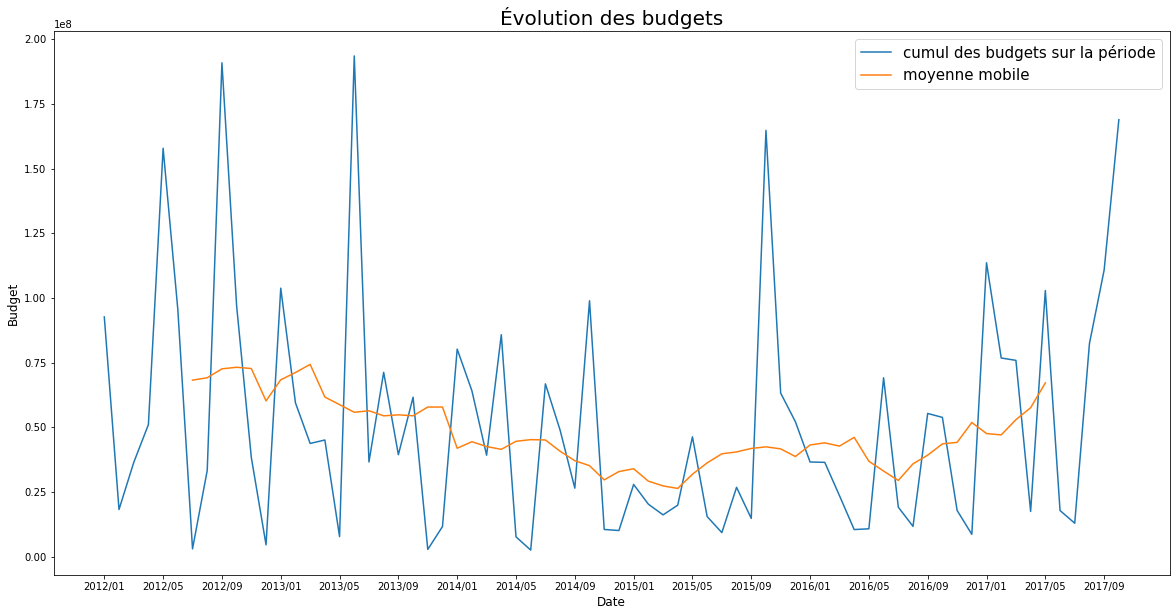

In [34]:
# Évolution du budget des films (graphique) :

# Préparation :
dataHorror["Années"] = dataHorror["Release Date"].dt.strftime('%Y/%m')
evoHorrorBudget = dataHorror.groupby("Date").sum()

# Visualisation de la courbe :
plt.figure(figsize=(20,10))
plt.plot(evoHorrorBudget["Budget"].astype(float), label = "cumul des budgets sur la période")
plt.title("Évolution des budgets",fontsize="20")
plt.xticks(np.arange(0, 70, step=4))
plt.xlabel('Date',fontsize="12")
plt.ylabel('Budget',fontsize="12")

# Moyenne flottante :
rolling_mean = evoHorrorBudget["Budget"].rolling(window = 12, center=True).mean()
plt.plot(rolling_mean, label = "moyenne mobile")
plt.legend(fontsize="15")

#### 3 - Saisonnalité

Text(0, 0.5, 'nbre de films')

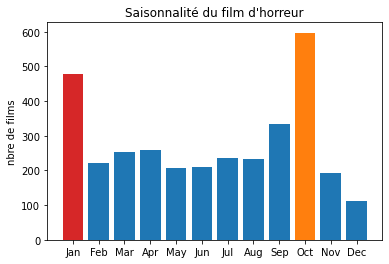

In [35]:
# Saisonnalité :

# Préparation :
dataHorror["Mois"] = dataHorror["Release Date"].dt.strftime("%m")
horrorSeason = dataHorror.groupby("Mois", as_index=False).count()

# Définition des variables :
x = horrorSeason["Mois"]
y = horrorSeason["Title"]

# Visualisation :
bars = ("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
plt.bar(x, y, color = ["C3", "C0", "C0", "C0", "C0", "C0", "C0", "C0", "C0", "C1", "C0", "C0"])
plt.xticks(x, bars)
plt.title("Saisonnalité du film d'horreur")
plt.ylabel("nbre de films")

Text(0.5, 1.0, "Attributs des monstres des 15 films d'horreur de la décennie")

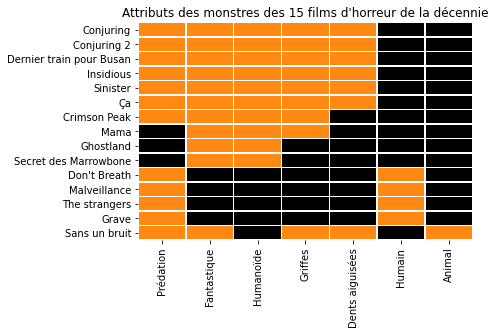

In [86]:
# 15 meilleurs films d'horreur de la décennie ("Allociné")
bestHorror = {"Film" : ["Grave","Mama","Sans un bruit","Insidious","Sinister","Don't Breath", "Ça", "Ghostland", "Dernier train pour Busan", "Conjuring","Crimson Peak","Malveillance","Secret des Marrowbone","The strangers","Conjuring 2"],
              "Fantastique" : [0,1,1,1,1,0,1,1,1,1,1,0,1,0,1],
              "Animal" : [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
              "Humain" : [1,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
              "Humanoïde" : [0,1,0,1,1,0,1,1,1,1,1,0,1,0,1],
              "Dents aiguisées" : [0,0,1,1,1,0,1,0,1,1,0,0,0,0,1],
              "Griffes" : [0,1,1,1,1,0,1,0,1,1,1,0,0,0,1],
              "Prédation" : [1,0,1,1,1,1,1,0,1,1,1,1,0,1,1]}
bestHorror = pd.DataFrame(bestHorror)
bestHorror = bestHorror.pivot_table(index="Film")
bestHorror = bestHorror[["Prédation","Fantastique","Humanoïde","Griffes","Dents aiguisées","Humain","Animal"]]
bestHorror = bestHorror.reindex(index=["Conjuring","Conjuring 2","Dernier train pour Busan","Insidious","Sinister","Ça","Crimson Peak","Mama","Ghostland","Secret des Marrowbone","Don't Breath","Malveillance","The strangers","Grave","Sans un bruit"])
sns.heatmap(bestHorror, cbar=False, cmap="gist_heat", linewidths=0.5, linecolor="white", center=0.65)
plt.ylabel("")
plt.title("Attributs des monstres des 15 films d'horreur de la décennie")

In [37]:
bestHorror

,Prédation,Fantastique,Humanoïde,Griffes,Dents aiguisées,Humain,Animal
Film,,,,,,,
Conjuring,1,1,1,1,1,0,0
Conjuring 2,1,1,1,1,1,0,0
Dernier train pour Busan,1,1,1,1,1,0,0
Insidious,1,1,1,1,1,0,0
Sinister,1,1,1,1,1,0,0
Ça,1,1,1,1,1,0,0
Crimson Peak,1,1,1,1,0,0,0
Mama,0,1,1,1,0,0,0
Ghostland,0,1,1,0,0,0,0


## II  - dataCreepy

### A - Évaluations en fonction du temps de lecture :

Text(0, 0.5, 'Note reçue')

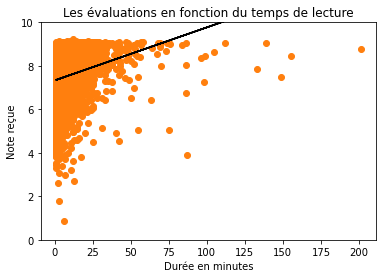

In [38]:
# Les évaluations en fonction de la durée (total)

# Suppression des valeurs manquantes :
dataCreepy2 = dataCreepy.drop(dataCreepy.loc[dataCreepy["estimated_reading_time"].isnull()].index)
dataCreepy2 = dataCreepy2.drop(dataCreepy2.loc[dataCreepy2["average_rating"].isnull()].index)

# Définition des variables :
x = dataCreepy2["estimated_reading_time"].astype("float64")
y = dataCreepy2["average_rating"].astype("float64")

# Propriétés de régression linéaire :
m, b = np.polyfit(x, y, 1)

# Nuage d'individus et regression :
plt.plot(x, y, 'o', color="#ff7f0e")
plt.plot(x, m*x+b, '-k')
plt.ylim(0,10)
plt.title("Les évaluations en fonction du temps de lecture")
plt.xlabel("Durée en minutes")
plt.ylabel("Note reçue")

In [39]:
# Corrélation (Pearson)
stats.pearsonr(dataCreepy2["estimated_reading_time"].astype("float64"), dataCreepy2["average_rating"])

(0.2458963522889587, 1.73642052650147e-49)

### B - Évolution des creepy pastas :

#### 1 - Nombre d'histoires :

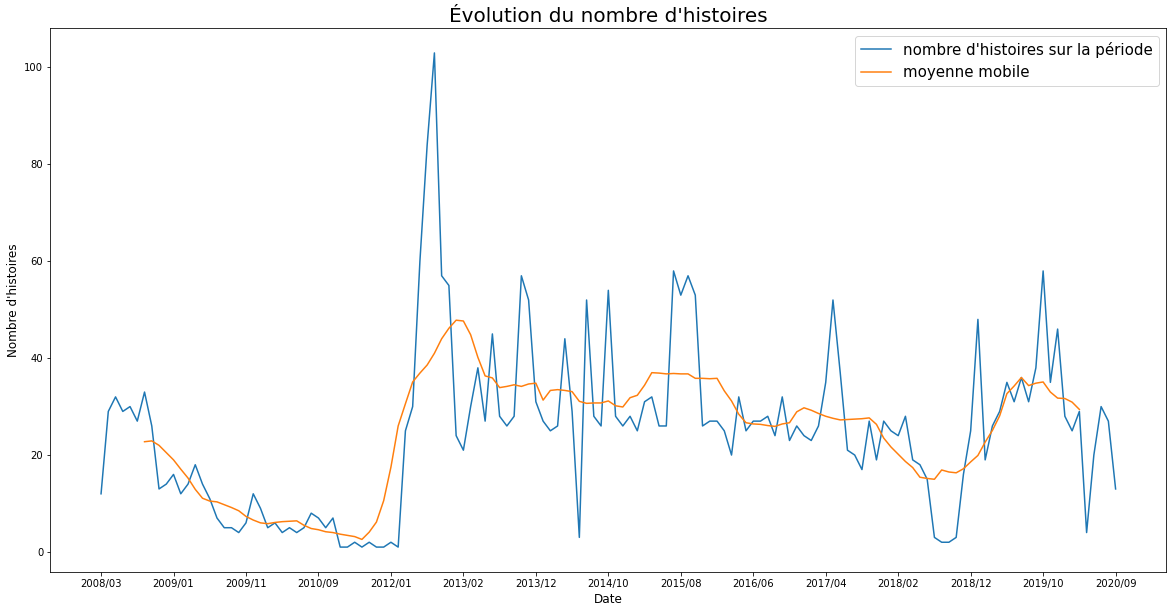

In [40]:
# Évolution du nombre d'histoires :

# Préparation :
dataCreepy["Années"] = dataCreepy["publish_date"].dt.strftime('%Y/%m')
evoCreepy = dataCreepy.groupby("Années").count()

# Visualisation de la courbe :
plt.figure(figsize=(20,10))
plt.plot(evoCreepy["story_name"], label = "nombre d'histoires sur la période")
plt.title("Évolution du nombre d'histoires",fontsize="20")
plt.xticks(np.arange(0, 3510, step=10))
plt.xlabel('Date',fontsize="12")
plt.ylabel("Nombre d'histoires", fontsize="12")

# Moyenne flottante :
rolling_mean = evoCreepy["story_name"].rolling(window = 12, center=True).mean()
plt.plot(rolling_mean, label = "moyenne mobile")
plt.legend(fontsize="15")

#### 2 - Temps de lecture des histoires :

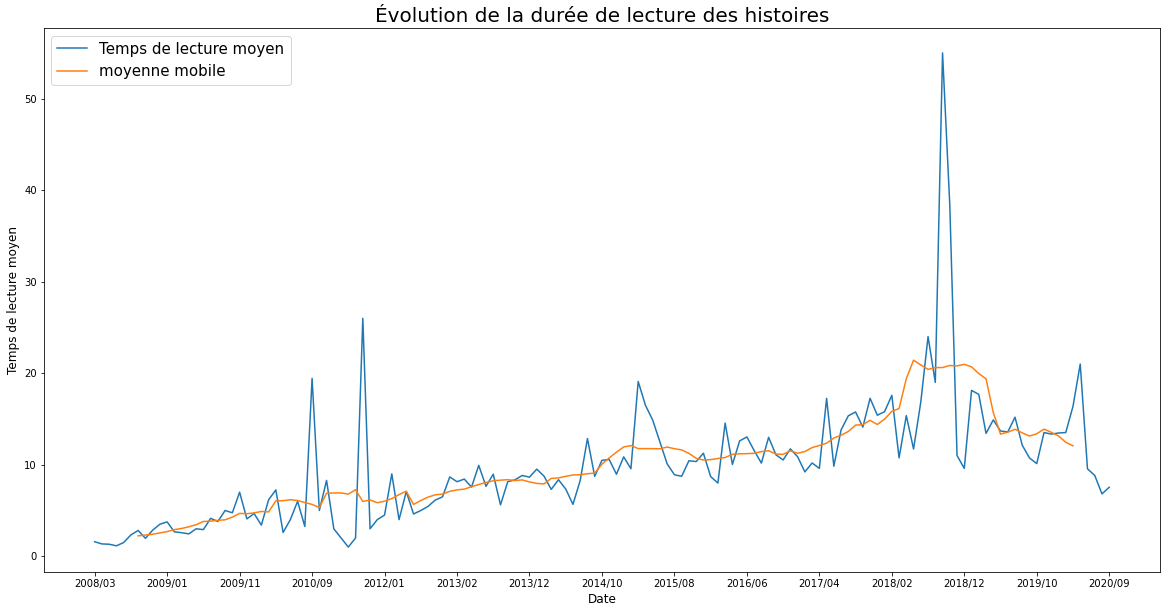

In [41]:
# Visualisation de la courbe :
evoCreepy2 = dataCreepy.groupby("Années").mean()

plt.figure(figsize=(20,10))
plt.plot(evoCreepy2["estimated_reading_time"].astype(float), label = "Temps de lecture moyen")
plt.title("Évolution de la durée de lecture des histoires",fontsize="20")
plt.xticks(np.arange(0, 3510, step=10))
plt.xlabel('Date', fontsize="12")
plt.ylabel("Temps de lecture moyen", fontsize="12")

# Moyenne flottante :
rolling_mean = evoCreepy2["estimated_reading_time"].rolling(window = 12, center=True).mean()
plt.plot(rolling_mean, label = "moyenne mobile")
plt.legend(fontsize="15")

### C - Bag of words

#### 1 - Tags des histoires les mieux notées :

In [42]:
# Dataframe des meilleures histoires
bestCreepy = dataCreepy[dataCreepy["average_rating"]>9]

In [43]:
# Création d'un sac de mot :

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

words = bestCreepy["categories"]

CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')

Count_data = CountVec.fit_transform(words)

cv_dataframe = pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())

In [44]:
# Total des mots :
cv_dataframe.loc["Total"] = cv_dataframe.sum()

In [45]:
# Liste des mots présents plus de 12 fois :
total = cv_dataframe.loc["Total"]
bestCreepyWords = total[total.values>12]
bestCreepyWords.sort_values(ascending=False)

beings            66
entities          66
strange           49
unexplained       49
deaths            36
disappearances    36
murders           36
illness           22
madness           21
mental            21
paranoia          21
science           15
sites             15
locations         15
childhood         14
children          14
cryptids          13
creatures         13
fiction           13
monsters          13
Name: Total, dtype: int64

In [46]:
# Liste des mots présent moins de 3 fois :
lastCreepyWords = total[total.values<3]
lastCreepyWords.sort_values(ascending=True)

injuries        1
wait            1
urban           1
toys            1
medical         1
hospitals       1
folktales       1
folklore        1
fantasy         1
wildlife        1
dolls           1
animals         1
drugs           2
body            2
christmas       2
thrillers       2
television      2
suspense        2
survival        2
space           2
slashers        2
occupations     2
military        2
conspiracies    2
lost            2
jobs            2
warfare         2
cosmic          2
holidays        2
government      2
gore            2
episodes        2
addictions      2
Name: Total, dtype: int64

Text(0.5, 0, "nombre d'occurrences")

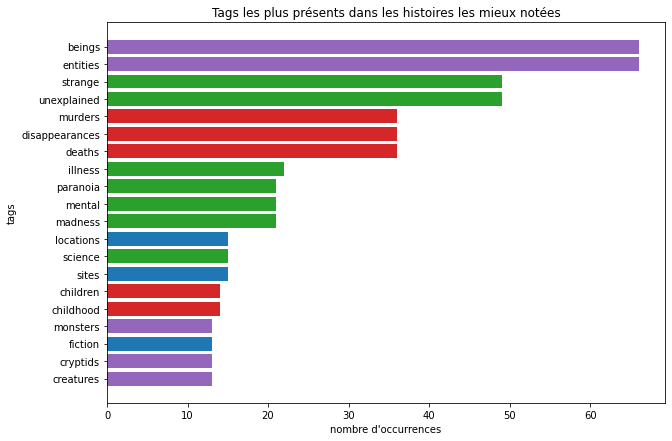

In [47]:
# Visualisation :
bestCreepyWords_desc = bestCreepyWords.sort_values(ascending=True)
x = bestCreepyWords_desc.index
y = bestCreepyWords_desc.values

plt.figure(figsize=(10,7))
plt.barh(x, y, color = ["C4", "C4", "C0", "C4", "C3","C3","C0","C2","C0","C2","C2","C2","C2","C3","C3","C3","C2","C2","C4","C4",])
plt.title("Tags les plus présents dans les histoires les mieux notées")
plt.ylabel("tags")
plt.xlabel("nombre d'occurrences")

In [48]:
# ANOVA :
anovaTagsRating = smf.ols("average_rating  ~ categories", data=dataCreepy).fit()
anovaTagsRating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.227
Date:                Mon, 31 May 2021   Prob (F-statistic):           8.70e-05
Time:                        15:41:33   Log-Likelihood:                -4829.5
No. Observations:                3509   AIC:                         1.138e+04
Df Residuals:                    2650   BIC:                         1.667e+04
Df Model:                         858                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                                                                                                                                                                                             8.1000      1.103      7.346      0.000       5.938      10.262
categories[T. Abductions and Kidnappings, Beings and Entities, Children and Childhood, Dark Fantasy, Folklore and Folktales, Locations and Sites, Myths and Legends, Slashers and Gore, Strange and Unexplained, Torture and Cannibalism ]                                                                                           -2.0800      1.559     -1.334      0.182      -5.138       0.978
categories[T. Abductions and Kidnappings, Beings and Entities, Children and Childhood, Deaths, Murders, and Disappearances, Insects, Spiders, and Parasites, Locations and Sites, Madness, Paranoia, and Mental Illness, Monsters, Creatures, and Cryptids, Psychological Horror, Suspense and Thrillers ]                           -1.6900      1.559     -1.084      0.279      -4.748       1.368
categories[T. Abductions and Kidnappings, Beings and Entities, Children and Childhood, Deaths, Murders, and Disappearances, Jobs and Occupations, Locations and Sites, Occult, Magic, and Witchcraft, Toys and Dolls ]                                                                                                               -2.3500      1.559     -1.507      0.132      -5.408       0.708
categories[T. Abductions and Kidnappings, Beings and Entities, Children and Childhood, Dreams and Nightmares, Monsters, Creatures, and Cryptids, Nature and the Outdoors, Strange and Unexplained ]                                                                                                                                  -1.1200      1.559     -0.71